### Use-case: A venture capitalist company has hired you as a Data Scientist. Your role is to perform statistical analysis on the data provided by them . The company also expects you to create a model that can predict the profit of the company based on company's spending pattern.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
#Check for missing data
#Identify the type of data we are dealing with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [16]:
finalData = pd.concat([pd.get_dummies(data['State']) , data.iloc[:,[0,1,2,4]]] , axis =1 )
finalData

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94
5,0,0,1,131876.90,99814.71,362861.36,156991.12
6,1,0,0,134615.46,147198.87,127716.82,156122.51
7,0,1,0,130298.13,145530.06,323876.68,155752.60
8,0,0,1,120542.52,148718.95,311613.29,152211.77
9,1,0,0,123334.88,108679.17,304981.62,149759.96


In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#R&D Spend          50 non-null float64 ----> Numerical data ----> Quantitative
#Administration     50 non-null float64 ----> Numerical data ----> Quantitative
#Marketing Spend    50 non-null float64 ----> Numerical data ----> Quantitative
#State              50 non-null object -----> Categorical data --> Qualitative
#Profit             50 non-null float64 ----> Numerical data ----> Quantitative


In [6]:
#For this example since Label(Profit) is numeric, therefore we will go for REGRESSION

In [7]:
#EDA
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


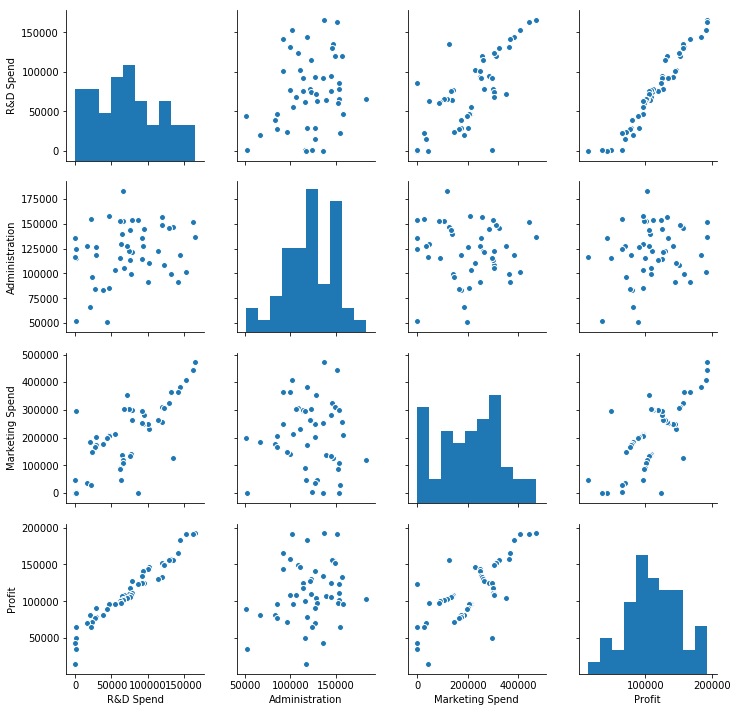

In [9]:
#Pair Plot
sns.pairplot(data)

In [10]:
#Co-relation between Features and label ---> Helpful only when your label is numeric continous.
#Whether the columns has any linear relationship or not
#Linear Relationship means with the increase in x, there must be increase in y(Ideal definition)
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
#There exists a strong linear relationship between Profit and R&D , Marketing
# Final Features ---> R&D Spend and MarketingSpend

In [17]:
finalData.corr() #Always consider only numerical data (Quantitative Data)

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


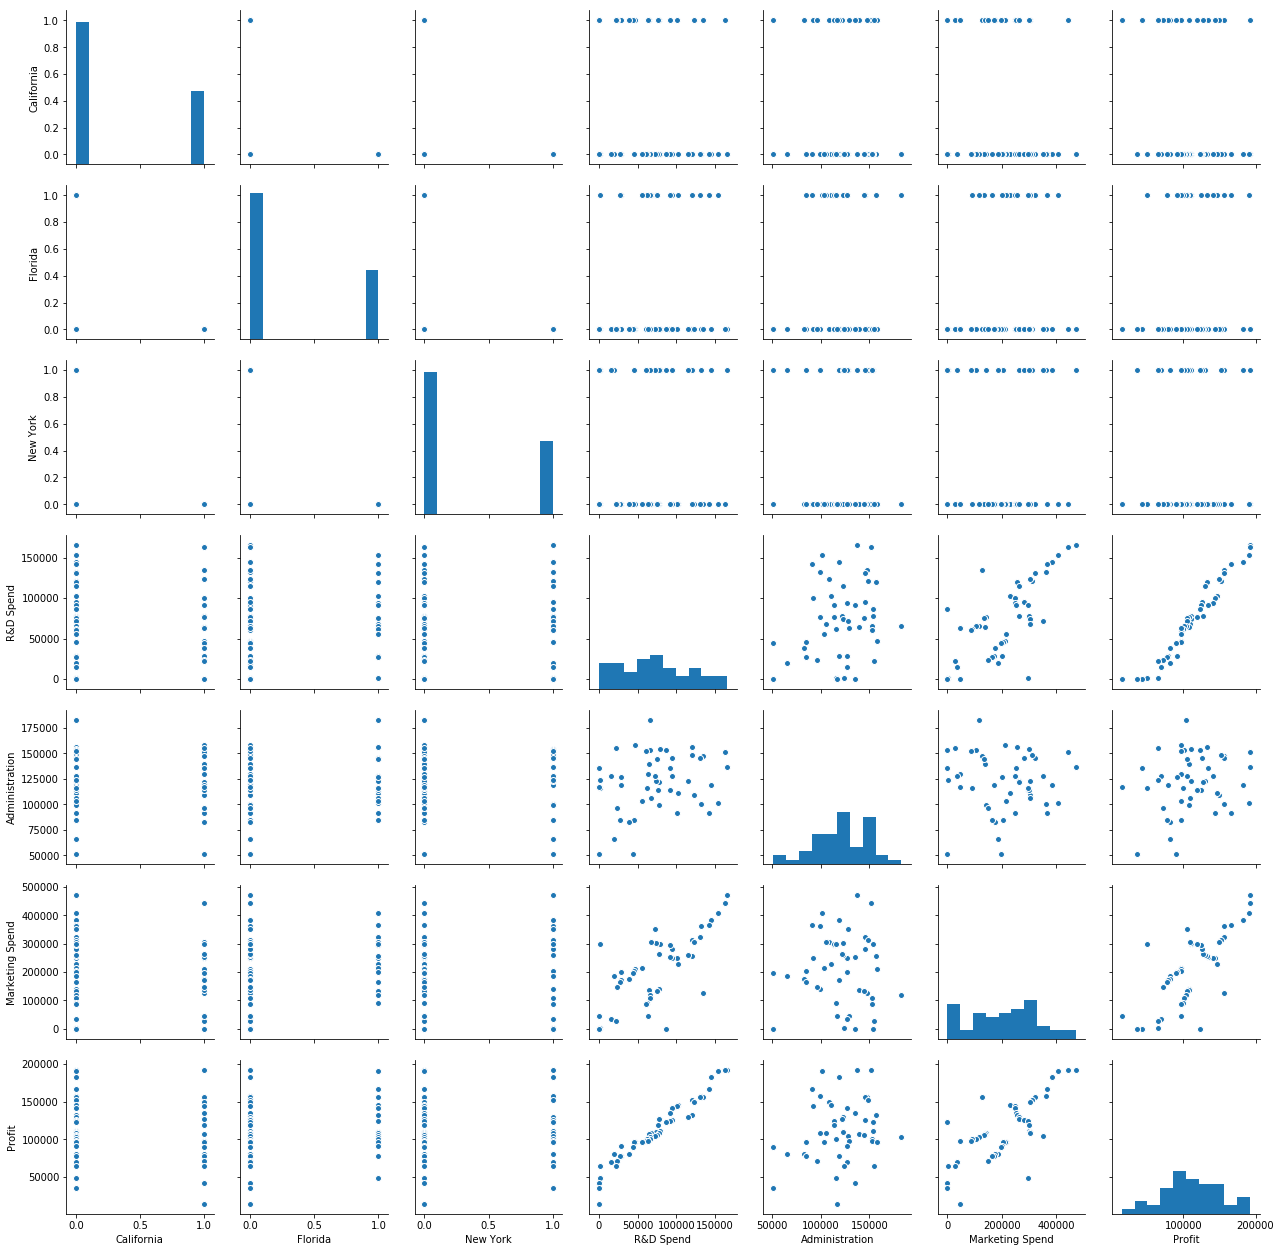

In [18]:
sns.pairplot(finalData)

In [19]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
#
data.groupby('State')['Profit'].sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

In [22]:
#Qualitative Descriptive Analysis
#Summarizing

data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64